<a href="https://colab.research.google.com/github/BoranyaSaikia/Capstone-Projects/blob/main/Netflix_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Netflix is a USA-based video-on demand streaming service platform. It offers a vast library of original and acquired films and TV Shows across a wide range of genres and languages. After its launch in 2007, it has successfully grown into one of the most-subscribed video streaming service.

In this project, we analyse Netflix's content library using machine learning clustering techniques. It groups similar movies and TV Shows based on their features. We compare two clustering methods - namely K-Means clustering and Agglomerative Hierarchical clustering; and compare their performance based on their silhouette scores. We also perform Exploratory data analysis to uncover various hidden patterns and find insights deemed useful for Netflix and various production houses. This is followed by a hypothesis testing to better understand the trends and patterns in the Netflix catalog.

This work aims to support data-driven deicison making for content organization and personalized recommendations on the Netflix platform.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


We work with the Netflix Dataset,collected from Fixable (a third-party Netflix Search Engine). The main objectives of the project are:

1. Exploratory Data Analysis

2. Understanding what type of content is available in different countries

3. If Netflix has been increasingly focusing on TV rather than movies in recent years

4. Clustering similar content by matching their text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio


from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

!pip install nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [2]:
# Load Dataset


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

netflix_data.index

RangeIndex(start=0, stop=7787, step=1)

In [7]:
netflix_data.shape

(7787, 12)

In [8]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [9]:
# Dataset Info

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count

int(netflix_data.duplicated().sum())

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### What did you know about your dataset?

The Netflix dataset is composed of 7787 rows and 12 columns. It has information about Netflix shows - their titles, the cast, the dircetor, the genre(listed_in), rating (age-based), the release year, the date added, country of production, type (movie or TV Show) and dscription of the show. There are no duplicate value. However, the dataset contains the following missing values: 2389 in directors column,  718 in cast column, 507 in country, 10 in date_added, and 7 in ratings. All the columns, except the release year has object datatype. The release year has integer datatype.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe

netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**show_id** : Unique ID for every Movie or TV Show

**type**: Identifier - A movie or TV show

**title**: Title of the movie or show

**director**: Director of the show

**cast**: Actors involved

**country**: Country of production

**date_added**: Date it was added on Netflix

**release_year**: Actual release year of the show

**rating**: TV rating od the show

**duration**: Total duration in minutes or number of seasons

**listed_in**: Genre

**Description**: The summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

print(netflix_data.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"], format = '%B %d, %Y', errors = 'coerce')
netflix_data["day_added"] = netflix_data["date_added"].dt.day
netflix_data["month_added"] = netflix_data["date_added"].dt.month
netflix_data["year_added"] = netflix_data["date_added"].dt.year

In [16]:
# Handling the missing values

netflix_data['cast'].fillna(value = 'No Data', inplace = True)
netflix_data['country'].fillna(value = 'No Data', inplace = True)
netflix_data['director'].fillna(value = 'No Data', inplace = True)

In [17]:
# Cleaning the duration column

netflix_data['duration_minutes'] = netflix_data.apply(
    lambda x: int(x['duration'].split()[0]) if 'min' in x['duration'] else None,
    axis=1
)
netflix_data['duration_seasons'] = netflix_data.apply(
    lambda x: int(x['duration'].split()[0]) if 'Seasons' in x['duration'] else None,
    axis=1
)

In [18]:
# Converting rating to categorical data

netflix_data['rating'] = netflix_data['rating'].astype('category')

### What all manipulations have you done and insights you found?

The following manipulations has been undertaken:

1. The date_added category has been sub-divided into day, month and year for easier and deeper analysis.

2. The missing values in cast, country and director columns have been filled with 'No Data'.

3. The duration column has been changed into an integer data type and split into two - duration in minutes for movies and duration in seasons for TV Shows.

4. The rating column has been converted into categorical datatype.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

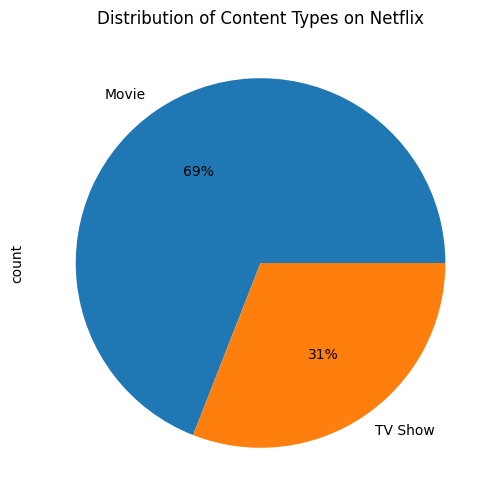

In [19]:
# Chart - 1 visualization code

# Distribution of content type on Netflix

plt.figure(figsize=(12,6))
plt.title("Distribution of Content Types on Netflix")
netflix_data['type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart has been selected because it effectively show proportions between two or more categories

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows that the Netflix library is heavily dominated by movies rather than TV shows. Around 3/4 of the library consists of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be utilized by Netflix to plan their future productions. It is important for Netflix to pinpoint the exact cause of this lopsided division - whether it is demand based or supply based. Over-focusing on only movies can alienate the subscribers who tend to like watching TV Series. It is important for a platform to balance content creation based on demand.

#### Chart - 2

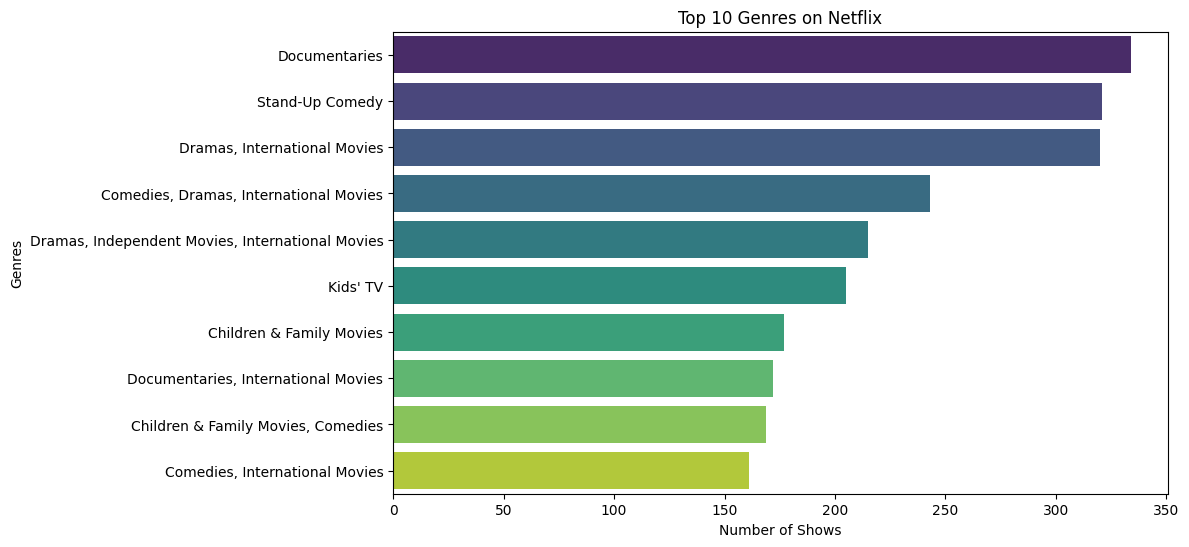

In [20]:
# Chart - 2 visualization code

# Understanding the popularity based on genre

genre_counts_top = netflix_data['listed_in'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x = genre_counts_top.values, y = genre_counts_top.index, palette = 'viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genres')
plt.show()

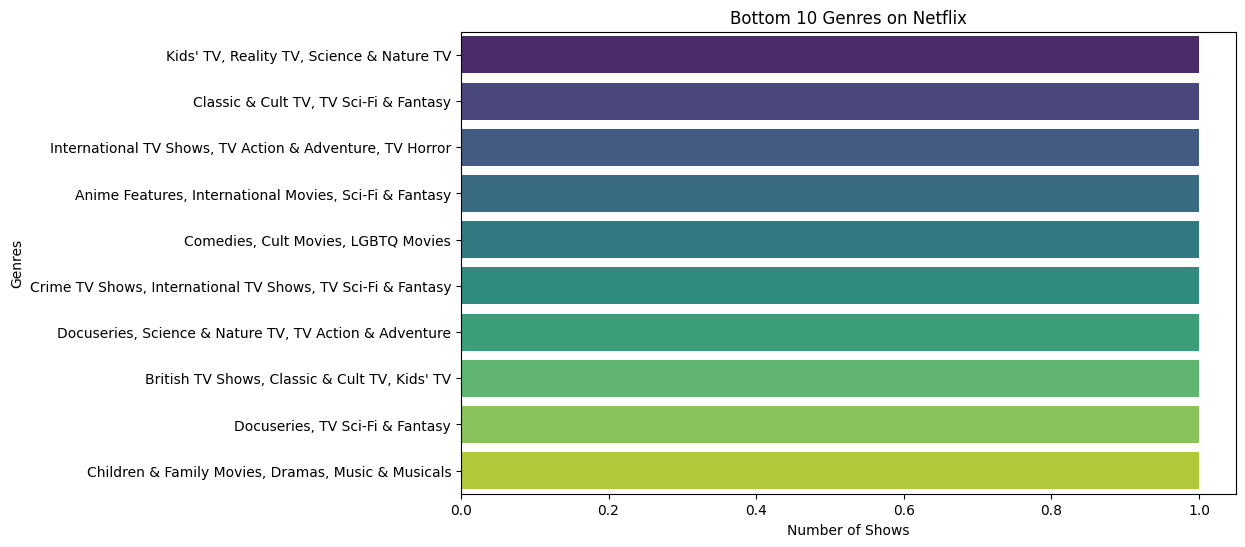

In [21]:
genre_counts_bottom = netflix_data['listed_in'].value_counts().tail(10)
plt.figure(figsize = (10,6))
sns.barplot(x = genre_counts_bottom.values, y = genre_counts_bottom.index, palette = 'viridis')
plt.title('Bottom 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart has been selected to depict the most available genres in Netflix. A bar chart in this case is ideal, because it helps us easilty visualize the frequency of different genres and thus it aides in comparisons

##### 2. What is/are the insight(s) found from the chart?

Most shows on Netflix belong to the genre under Documentaries, Stand-up Comedies and International Movies and Drama. While these represent the dominant genres on Netflix, the genres with fewer titles might indicate the niche content areas. These include Kids Musical shows,Docuseries around Sci-Fi and fantasy among others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The classification can help business identify the popular genres to attract and retain subscribers. However, they must be careful not to over-rely on these specific genres as it could lead to oversaturation of the library and reduce diversity. Moreover, exploring the niche content areas might help Netflix bring on board new subscribers.

#### Chart - 3

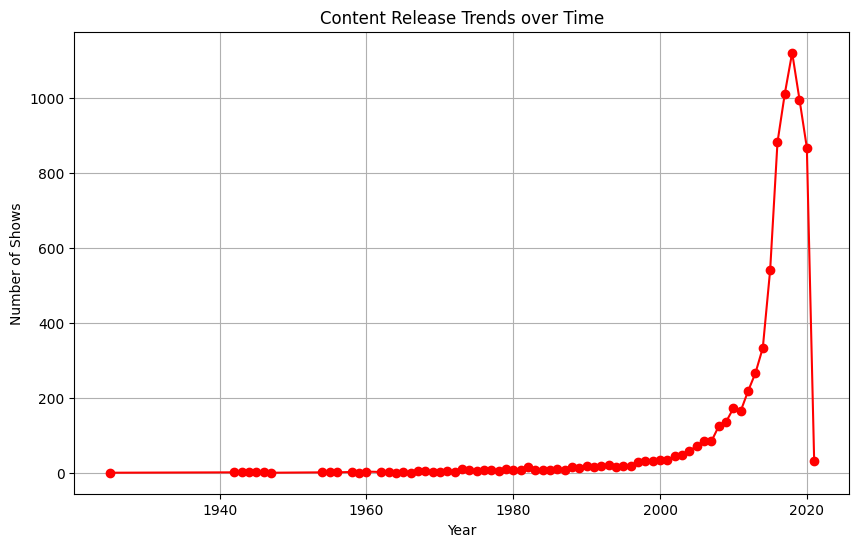

In [22]:
# Chart - 3 visualization code

# Understanding Content release trends over time

release_trends = netflix_data['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
release_trends.plot (kind = 'line', color ='red', marker = 'o')
plt.title('Content Release Trends over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was chosen as it is the ideal representation to visualize and spot trends in time series data.

##### 2. What is/are the insight(s) found from the chart?

The line chart shows that there has been a sudden spike in the release of content as we near the year 2019-2020. Around this time, there has been either production or acquisition spike.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We need to analyze what caused the spike in content release around 2019-2020. The spike might be because of increase in acquisition rather than production. A careful comparison with the stagnation in the prior years can also provide insights into what prompted the sudden spurt in content on the platform.

#### Chart - 4

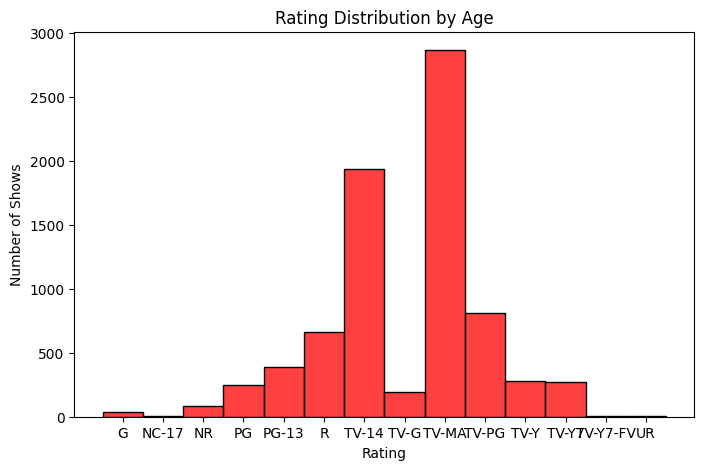

In [23]:
# Chart - 4 visualization code

#Rating Distribution by Age

plt.figure(figsize = (8,5))
sns.histplot(netflix_data['rating'], kde = False, bins = 10, color = 'red')
plt.title('Rating Distribution by Age')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is an ideal representation to understand the distribution of data across various categories.

##### 2. What is/are the insight(s) found from the chart?

As clearly visible from the chart, Netflix caters mostly to the mature audience (TV -MA). This is followed at a distant second by TV-14 (Parents Strongly Cautioned), and TV-PG (Under Parental Guidance).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can use this insight for decisions related to production. They must ensure that the shows they produce aligns with the primary audience's needs. Moreover, the niche age groups can be explored to warranty that certain demographics are not neglected. Creation of more shows within the underserved age ratings can help Netflix smoothen out its missed subscriber opportunities.

#### Chart - 5

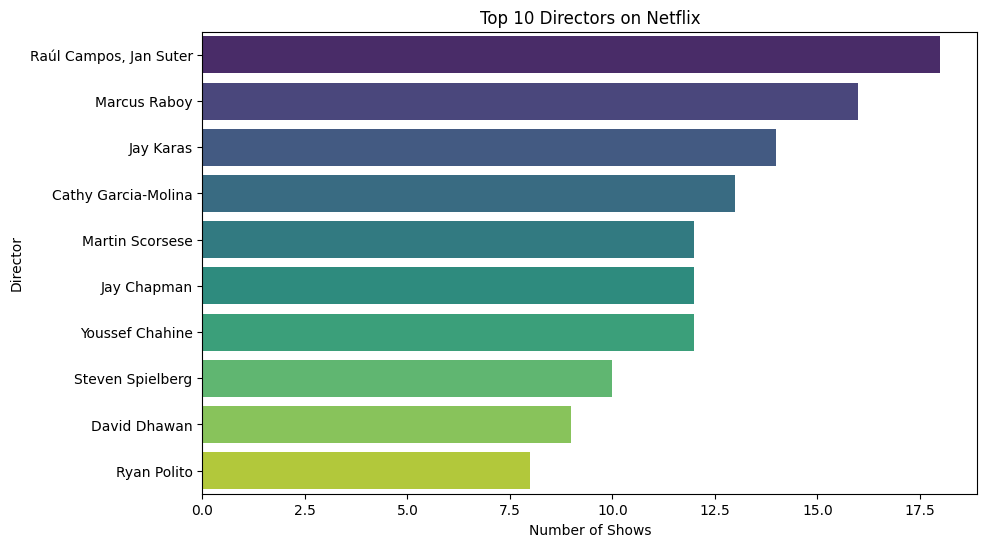

In [24]:
# Chart - 5 visualization code

# Director contribution

filtered_directors = netflix_data[netflix_data['director'] != 'No Data']
top_directors = filtered_directors['director'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x = top_directors.values, y = top_directors.index, palette = 'viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal chart is optimal for displaying long categorical data such as the director's names.

##### 2. What is/are the insight(s) found from the chart?

The horizontal chart highlights the directors who contribute the most content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Production houses can use this information and couple it with other insights to identify the prolific collaborators for future partnerships. Moreover, the platform need to be mindful that over-reliance on a select few directors may lead to repititive story-telling thus leading to a decline in subscriber count.

#### Chart - 6

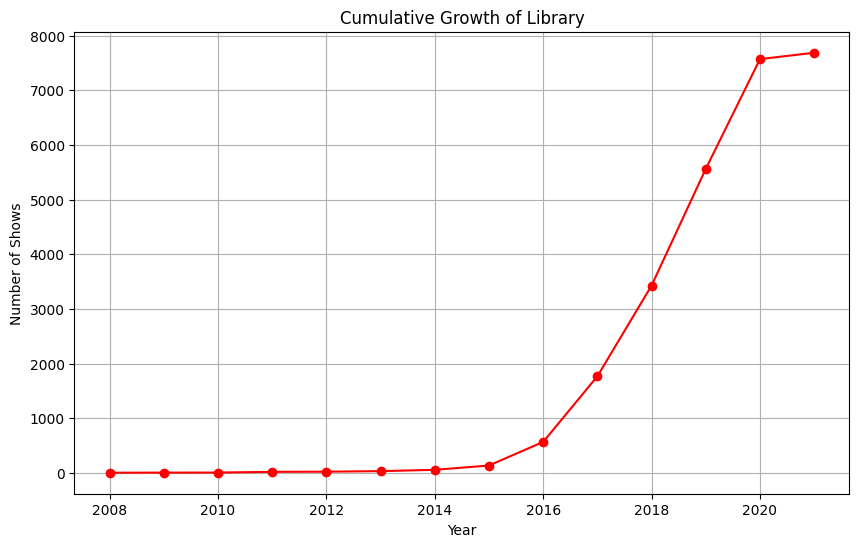

In [25]:
# Chart - 6 visualization code

# Cumulative Growth of Library

netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added']).dt.year
added_trends = netflix_data['year_added'].value_counts().sort_index()
plt.figure(figsize = (10,6))
added_trends.cumsum().plot(kind = 'line', color = 'red', marker = 'o')
plt.title('Cumulative Growth of Library')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A cumulative chart is the best way to depict the growth, stagnation or decline of a library over time.

##### 2. What is/are the insight(s) found from the chart?

As highlighted from the chart, Netflix consistently expands its catalog. It had a period of stagnation during its initial years. However, 2014 onwards, it kept on expanding its library consistently over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The steady growth in the Netflix library is a reliable assurance sign for the investors as well as the subscribers. A plateau in the growth could be a signal to revamp content strategies. Along with growth, the general diversity in shows coupled with the associated profitability too needs to be regularly gauged.

#### Chart - 7

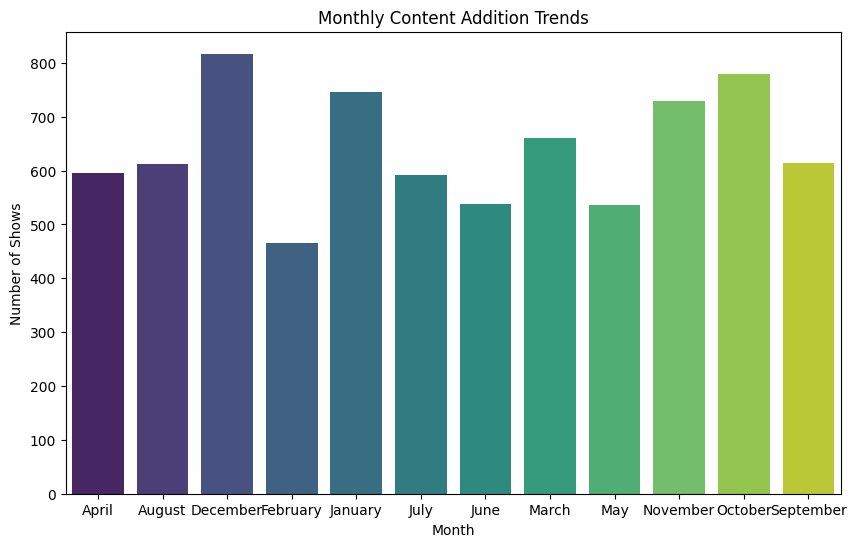

In [26]:
# Chart - 7 visualization code

# Monthly Content Addition Trends

netflix_data ['month_added'] = pd.to_datetime(netflix_data['date_added']).dt.month_name()
monthly_trends = netflix_data['month_added'].value_counts().sort_index()
plt.figure(figsize = (10,6))
sns.barplot(x = monthly_trends.index, y = monthly_trends.values, palette = 'viridis')
plt.title('Monthly Content Addition Trends')
plt.xlabel('Month')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualization of comparisons across various categories. Thus, it has been selected in this case

##### 2. What is/are the insight(s) found from the chart?

The above chart shows the seasonal content addition trends. The chart depicts a spike mainly around the months of December, January and October. The holiday and festival seasons during these months can be a key factor for this spike.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Production houses can plan their release calendar based on this insight. It is important to optimize content during the periods of high-demand. Moreover, release of content during the underserved months such as June and May can help to keep subscribers engaged. This periods can also prove to be less competitive than the high-demand periods.

#### Chart - 8

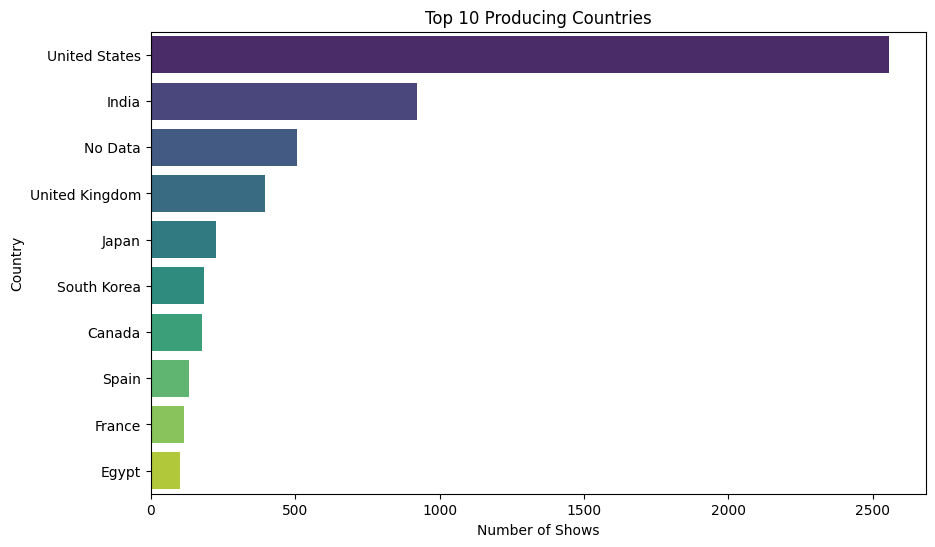

In [27]:
# Chart - 8 visualization code

# Top Content Producing Countries

country_counts = netflix_data['country'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x = country_counts.values, y = country_counts.index, palette = 'viridis')
plt.title('Top 10 Producing Countries')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph has been selected to depict the top ten content-producing countries on Netflix. A bar graph is an apt visualization for comparison-based analysis across various categories.

##### 2. What is/are the insight(s) found from the chart?

The above chart highlights the countries which dominate production on Netflix. USA produces more than half of the shows. India stands at a distant second.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business can use this insight to guide their decisions on investments for international partnerships. Over-reliance on a few countries can greatly hinder the diversity in content. It is important to explore production opportunities in the non-dominant countries. This can ensure an inclusive and diverse platform and can help to capture the underseved demographics as well.

#### Chart - 9

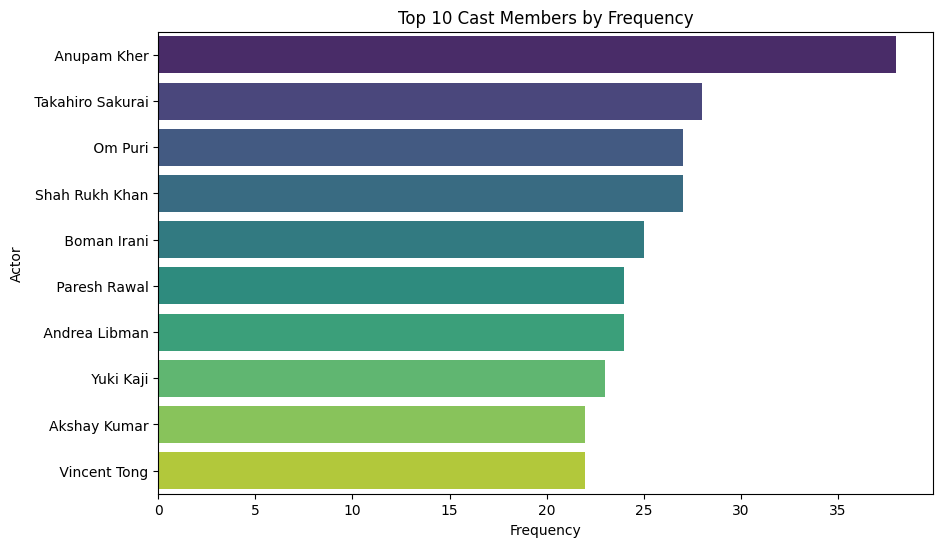

In [28]:
# Chart - 9 visualization code

# Top 10 Cast Members by Frequency

from collections import Counter

filtered_cast = netflix_data[netflix_data['cast'] != 'No Data']
cast_list = filtered_cast['cast'].dropna().str.split(',').sum()
top_cast = Counter(cast_list).most_common(10)
cast_df = pd.DataFrame(top_cast, columns = ['Actor', 'Frequency'])

plt.figure(figsize = (10,6))
sns.barplot(x = 'Frequency', y = 'Actor', data = cast_df, palette = 'viridis')
plt.title('Top 10 Cast Members by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an ideal representation technique for comparison-based analysis of various categories. Hence, it has been chosen.

##### 2. What is/are the insight(s) found from the chart?

The above chart highlights the top ten most prolific cast members who have featured in multiple Netflix productions. It is an indicator casting trends and popular choices among the Netflix producers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can retain the popular actors or give them lead roles in future productions. It can ensure greater audience engagement. However, a balance need to be struck to avoid over-reliance on a select few to prevent stagnation and viewer fatigue.

#### Chart - 10

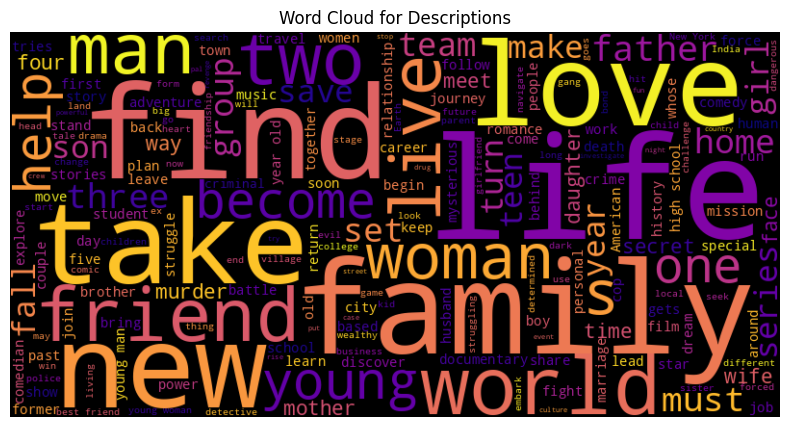

In [29]:
# Chart - 10 visualization code


# Word Cloud for Descriptions

from wordcloud import WordCloud

description_text = ''.join(netflix_data['description'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = 'black', colormap = 'plasma').generate(description_text)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud helps us idetify the most frequently used words in content description.

##### 2. What is/are the insight(s) found from the chart?

The word cloud above highlights the recurring terms that occur in the description of the Netflix show. This highlights the common themes or the narrative styles in its catalog. The most used word include Family, Love, World, Find, Friend among others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight can be used to gauge the themes of the content on Netflix. If themes appear to be reptitive, it can indicate a lack of content diversity. On the other hand, the popular themse or keywords can be effectively used in marketing campaigns to improve audience engagement.

#### Chart - 11

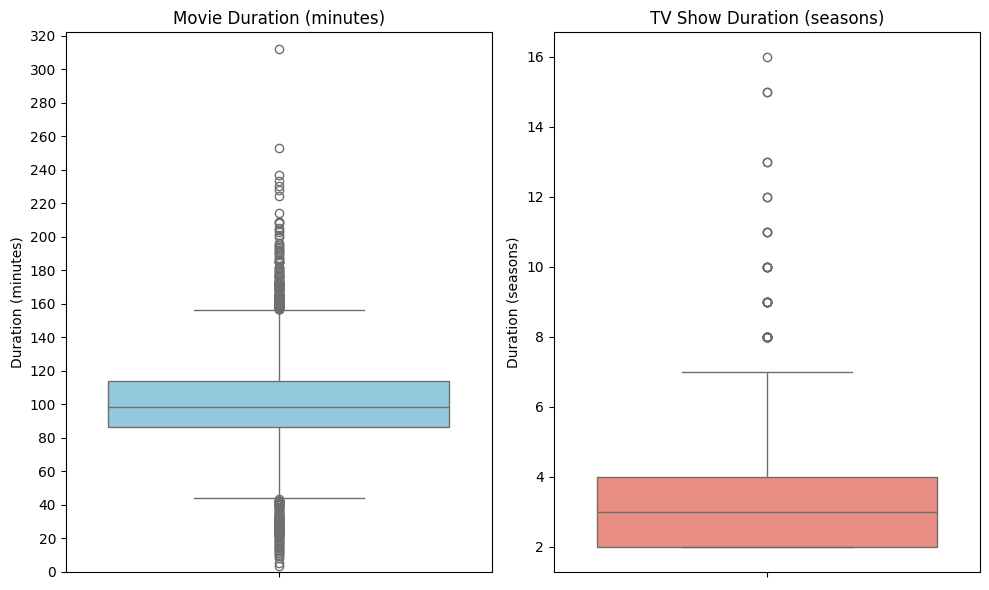

In [30]:
# Chart - 11 visualization code

# Duration distribbution of movies and TV shows


# Separate data for movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot movie durations
plt.subplot(1, 2, 1)
sns.boxplot(y=movies['duration_minutes'], color='skyblue')
plt.title('Movie Duration (minutes)')
plt.ylabel('Duration (minutes)')
# Set y-axis ticks at sensible intervals
max_mins = movies['duration_minutes'].max()
ticks = range(0, int(max_mins) + 20, 20)
plt.yticks(ticks)
plt.ylim(0, max_mins + 10)  # Add a little buffer

# Plot TV show durations
plt.subplot(1, 2, 2)
sns.boxplot(y=tv_shows['duration_seasons'], color='salmon')
plt.title('TV Show Duration (seasons)')
plt.ylabel('Duration (seasons)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Box Plots are effective for understanding the spread, median, and outliers of numerical data - in this case, duration.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows that TV shows have typically shorter and consistent durations measured in seasons, while movies tend to have longer and a wide range of durations measured in minutes. There are outliers in both the categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business can identify the duration trends that resonate with viewers. Coupling this information with views count can help production houses plan their content better. It is important to be mindful that extreme durations might disengage certain audience segments.

#### Chart - 12

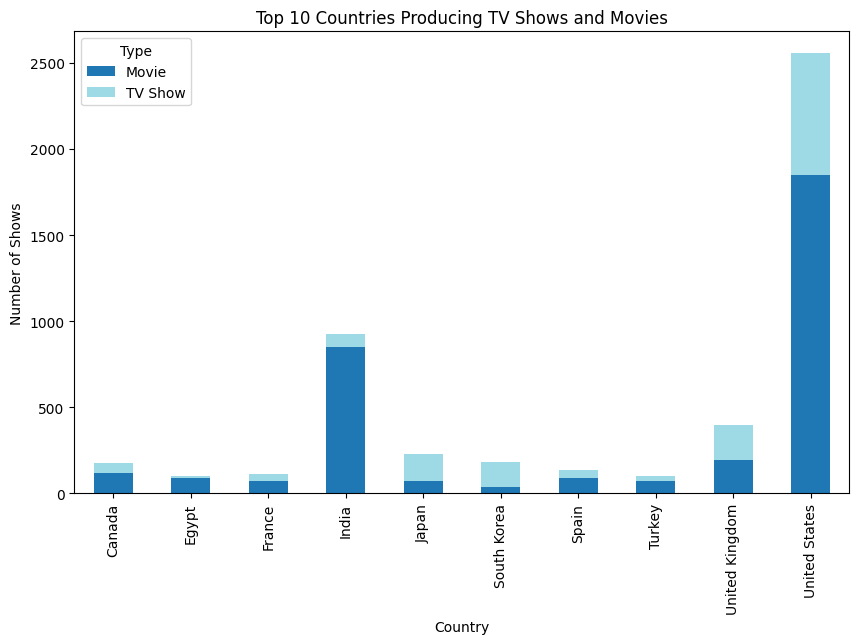

In [31]:
# Chart - 12 visualization code

# Top 10 countries producing TV shows and Movies

filtered_country = netflix_data[netflix_data['country'] != 'No Data']
top_countries = filtered_country['country'].value_counts().head(10)
country_type = filtered_country[filtered_country['country'].isin(top_countries.index)].groupby(['country', 'type']).size().unstack(fill_value=0) #Fixed: Grouped the filtered dataframe
country_type.plot(kind = 'bar', stacked = True, figsize = (10,6), colormap ='tab20')
plt.title('Top 10 Countries Producing TV Shows and Movies')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend(title = 'Type')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is used because it aides comparison among different countries in production across both TV shows and movies.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights that in all countries, production of movies is prioritized over production of TV Shows. USA emerges as the top producer country of both TV Shows as well as mvoies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be utilized by production companies in forging their international partnerships and advance their investment decision in future. Focus should be on the top performing countries; while the underrepresented regions need to be further explored. Over-reliance on a few countries can limit geographic appeal and alienate the diverse audience members.

#### Chart - 13

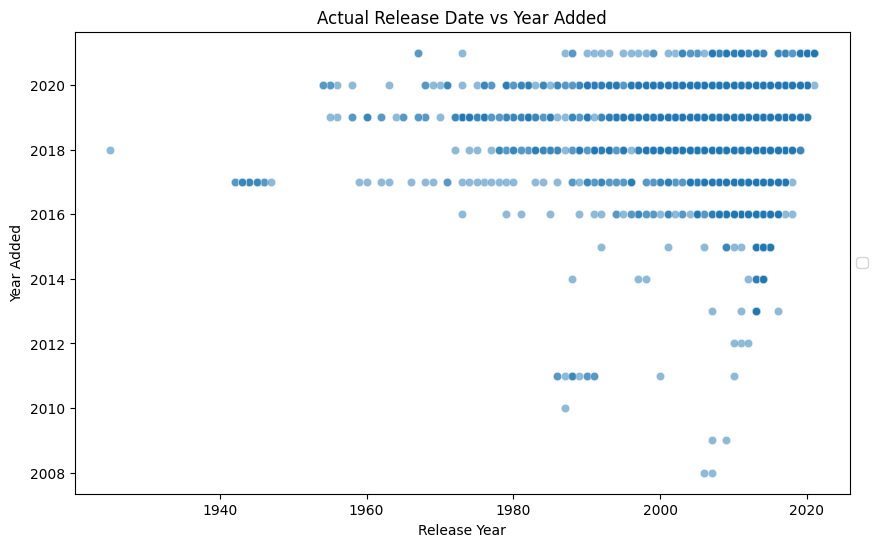

In [32]:
# Chart - 13 visualization code

# To compare actual release date and year added of Shows


plt.figure(figsize = (10,6))
sns.scatterplot(x = 'release_year', y = 'year_added', data = netflix_data, alpha = 0.5)
plt.title('Actual Release Date vs Year Added')
plt.ylabel('Year Added')
plt.xlabel('Release Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot has been used to compare the year of release to the year in which it was added on Netflix. It is used because it is the standard and most effective way to visualize the relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

There has been a lag in content acquisition as majority of the shows have been added after their release year. This indicates a strategic addition of classic titles. Moroever, there has been timely acquisition of new content as well - particularly in the recent years.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The addition of older content can help to boost the diversity of the platform and result in improved engagement with audience. However, it is important to maintain a balanced mix of new and classic content to cater to a broader demographic.

#### Chart - 14 - Correlation Heatmap

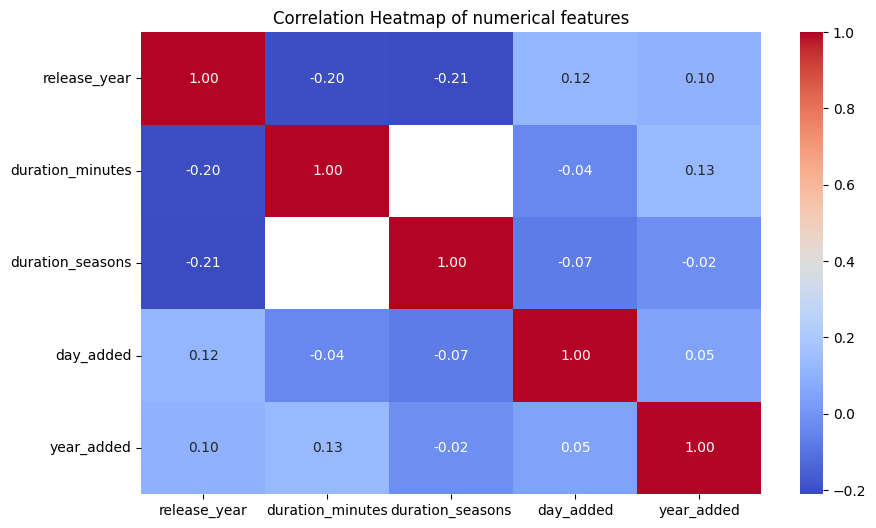

In [33]:
# Correlation Heatmap visualization code

numeric_columns = ['release_year','duration_minutes', 'duration_seasons', 'day_added' , 'year_added']
correlation_matrix = netflix_data[numeric_columns].corr()

plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of numerical features')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap has been selected because it is an excellent tool for visualizing the relationships between all the numeric values at a single glance.

##### 2. What is/are the insight(s) found from the chart?

The release year and the duration shows a negative correlation. So, the more recent relases tend to have slightly lesser durations. The release year and the year added has a weak positive correlation. Thus, Netflix continues to add both older and newer content.

#### Chart - 15 - Pair Plot

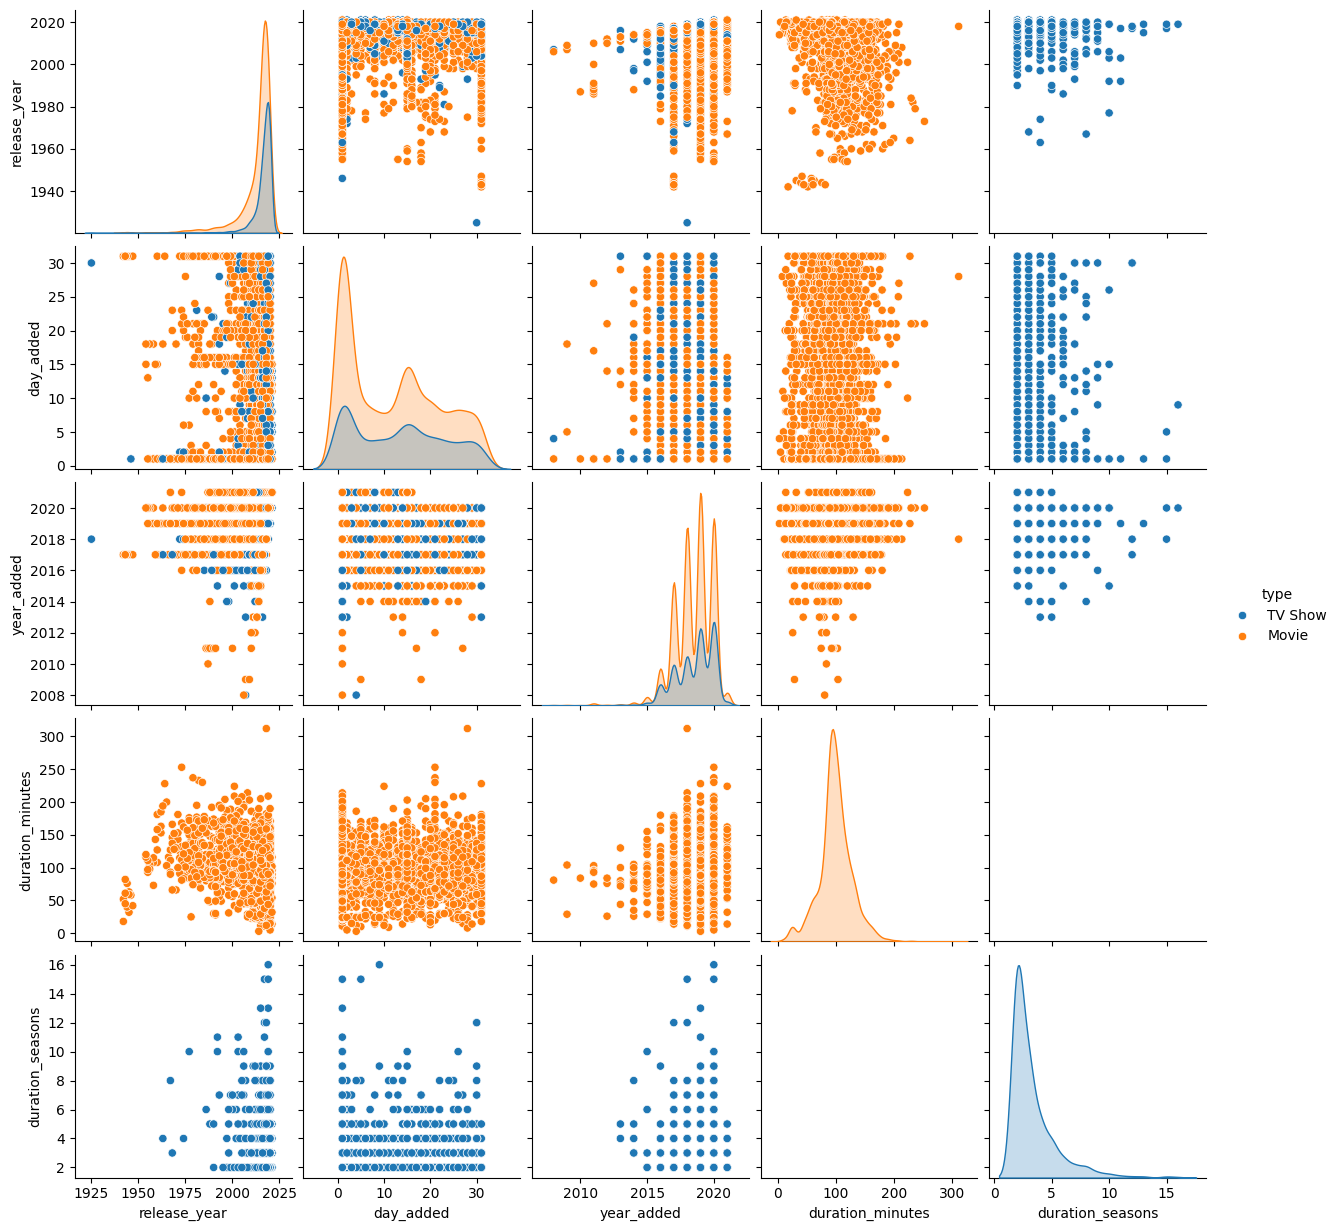

In [34]:
# Pair Plot visualization code

sns.pairplot(netflix_data, hue = 'type')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot has been picked because it facilitates visualization of relationships between multiple numerical varaibles at once.

##### 2. What is/are the insight(s) found from the chart?

The following insights can be found:

1. Movies have a wide range of duration compared to TV Shows.

2. Older released have been recently added to the Netflix catalog to diversify its content.

3. Move towards shorter duration movies in the recent years.

4. 2016-2020 has seen a period of rapid catalog expansion.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

I have chosen the following research questions to perform hypothesis testing:

1. Do movies added recently have shorter durations than older movies?

2. Are certain genres overrepresented in specific countries?

3. Is the TV Show/Movie Ratio different across age ratings?  

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The first hypothetical statement is stated below:

Null Hypothesis: Mean duration of movies and shows added in the last 3 years = mean duration of movies added earlier

Alternate Hypothesis: Mean duration of movies and shows added in the last 3 years is not equal to the mean duration of older movies.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

recent_movies = netflix_data[netflix_data['year_added'] >= 2018]
older_movies = netflix_data[netflix_data['year_added'] < 2018]

recent_movies['duration'] = pd.to_numeric(recent_movies['duration'].str.extract('(\d+)', expand = False), errors= 'coerce')
older_movies['duration'] = pd.to_numeric(older_movies['duration'].str.extract('(\d+)', expand = False), errors= 'coerce')

recent_movies = recent_movies.dropna(subset=['duration'])
older_movies = older_movies.dropna(subset=['duration'])

t_statistic, p_value = ttest_ind(recent_movies['duration'], older_movies['duration'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.285843957767033
P-value: 1.2856590047949825e-07


The values suggest that there is a significant difference in the average duration between recently added movies and older movies. The positive t-test value suggest that older movies have longer duration than recent movies.

##### Which statistical test have you done to obtain P-Value?

Two Sample t-test was selected to obtain P-Value.

##### Why did you choose the specific statistical test?

Two Sample t-test was selected because it compares the means of two independent groups - recent vs older movies.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Are certain genres overrepresented in specific countries?

Null hypotheses: Genre distribution is independent of country

Alternate Hypothesis: Genre distribution depends on country

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

genre_counts = netflix_data['listed_in'].value_counts()
netflix_data['genre_grouped'] = netflix_data['listed_in'].apply(lambda x: 'Other Genre' if x not in genre_counts.head(10).index else x)

country_counts = netflix_data['country'].value_counts()
netflix_data['country_grouped'] = netflix_data['country'].apply(lambda x: 'Other Country' if x not in country_counts.head(10).index else x)

contingency_table = pd.crosstab(netflix_data['country_grouped'], netflix_data['genre_grouped'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 2437.1826566792356
P-value: 0.0


As the p-value is far below 0.05, we reject the null hypothesis. Therefore, there is a significant association between genre and country. Thus, certain genres are indeed overrepresented in specific countries.

##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence has been selected to obtain the P-Value

##### Why did you choose the specific statistical test?

Chi-square test has been slected because it tests for association between two categorical values - genre and country here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is the TV Show/Movie Ratio different across age ratings?

Null Hypothesis: Proportion of TV shows ie equal across all age ratings

Alternate Hypothesis: Proportion of TV Shows varies by age ratings

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(netflix_data['rating'], netflix_data['type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 931.8414205494454
P-value: 7.496336931136952e-191


As the p-value is very close to zero, we reject the null hypothesis. Thus, the ratio of TV Shows to Movie differ significantly by age rating.

##### Which statistical test have you done to obtain P-Value?

Chi-Square test for proportion has been used to obtain P-Value.

##### Why did you choose the specific statistical test?

The chi-square test for proportion has been selected because compares categorical distribution of data - content type across ratings.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation

netflix_data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,7
duration,0


In [39]:
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace = True)
netflix_data.dropna(subset = ['date_added', 'day_added'], inplace = True)

In [40]:
print(netflix_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7689 entries, 0 to 7786
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7689 non-null   object        
 1   type              7689 non-null   object        
 2   title             7689 non-null   object        
 3   director          7689 non-null   object        
 4   cast              7689 non-null   object        
 5   country           7689 non-null   object        
 6   date_added        7689 non-null   datetime64[ns]
 7   release_year      7689 non-null   int64         
 8   rating            7689 non-null   category      
 9   duration          7689 non-null   object        
 10  listed_in         7689 non-null   object        
 11  description       7689 non-null   object        
 12  day_added         7689 non-null   float64       
 13  month_added       7689 non-null   object        
 14  year_added        7689 non-nu

#### What all missing value imputation techniques have you used and why did you use those techniques?

We used the Mode Imputation technique to deal with the missing data in the ratings.Ratings is a categorical data. Using Mode imputation preserves the categorical nature of the variable. Moreover, most data have one dominant rating - TV MA. Also, the number of missing ratings is limited - 7 in mumber.

To deal with the missing dates, we use dropna(). For clustering based on text features, we don't really need date_added as a feature. Moreover, only 98 entries are missing, which is around 1.26% of the total entries. So, dropping it is reasonable.

### 2. Handling Outliers

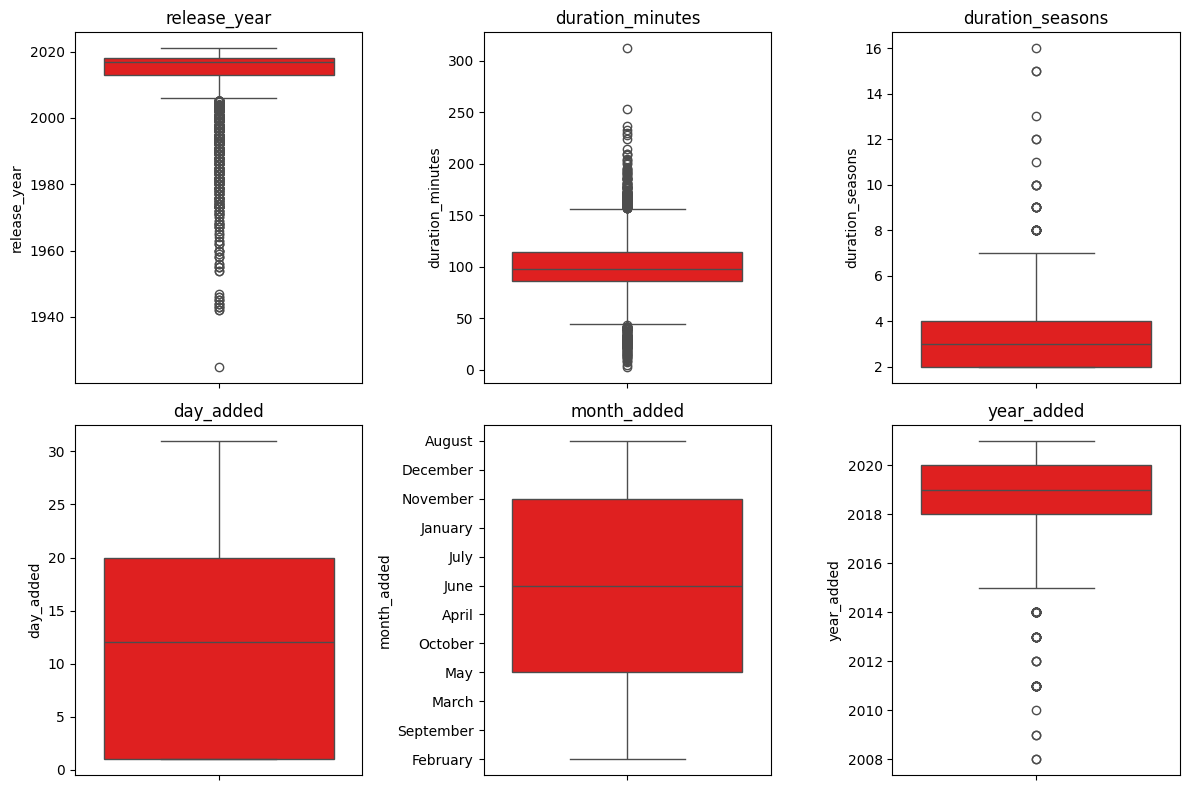

In [41]:
# Visualizing Outliers

continuous_value = ['release_year', 'duration_minutes', 'duration_seasons', 'day_added', 'month_added', 'year_added']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # Flatten for easier iteration

for i, col in enumerate(continuous_value):
    sns.boxplot(y=netflix_data[col], color='red', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [42]:
# Handling Outliers & Outlier treatments

def cap_outliers_IQR(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

for col in ['release_year', 'duration_minutes', 'duration_seasons']:
    netflix_data = cap_outliers_IQR(netflix_data, col)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Capping of outliers is used rather than removing the outliers because it preserves as much as the original data as possible while still reducing the impact of extreme values.

Interquartile method has been used to handle the outliers because it is robust to outliers and preserves the data structure.

### 3. Categorical Encoding

In [43]:
# Encode the type and rating columns

categorical_cols = ['type', 'rating']
netflix_encoded = pd.get_dummies(netflix_data[categorical_cols], dtype = int)
netflix_data = pd.concat([netflix_data, netflix_encoded], axis = 1)

In [44]:
# Encode the country and listed_in columns

for col in ['country', 'listed_in']:
  freq = netflix_data[col].value_counts(normalize = True)
  netflix_data[col + '_freq'] = netflix_data[col].map(freq)

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. One-Hot Encoding has been used for type and rating. It has been used because type has only two unique variables and rating has 14 unique values. One-Hot Encoding creates a new binary column for each unique category.

2. Frequency Encoding has been used for country and listed_in as these columns have high cardinality. It replaces each category with its frequency in the dataset.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction

!pip install contractions
import contractions

netflix_data['description_clean'] = netflix_data['description'].astype(str).apply(contractions.fix)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.8 MB/s eta 0:00:00


#### 2. Lower Casing

In [46]:
# Lower Casing

text_columns = ['title', 'description_clean', 'cast', 'director', 'listed_in', 'country']

for col in text_columns:
    netflix_data[col] = netflix_data[col].astype(str).str.lower()

#### 3. Removing Punctuations

In [47]:
# Remove Punctuations

import string

def remove_punctuation(text):
  return re.sub(f"[{re.escape(string.punctuation)}]", "", text)

netflix_data['description_clean'] = netflix_data['description_clean'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


netflix_data['description_clean'] = netflix_data['description_clean'].apply(remove_urls)

# Remove digits

def remove_digits(text):
  text = re.sub(r'\d+', '', text)
  return text

netflix_data['description_clean'] = netflix_data['description_clean'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords

def remove_stopwords(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words]
  return ' '.join(tokens)

netflix_data['description_clean'] = netflix_data['description_clean'].apply(remove_stopwords)


In [50]:
# Remove White spaces

def remove_extra_spaces(text):
  return ' '.join(text.split())

text_columns = ['title', 'description_clean', 'cast', 'director', 'listed_in', 'country']

for col in text_columns:
  netflix_data[col] = netflix_data[col].astype(str).apply(remove_extra_spaces)

#### 6. Rephrase Text

In [51]:
# Rephrase Text

!pip install transformers sentencepiece

from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def paraphrase_text(text):
  input_text = "paraphrase: " + text + "</s>"
  encoding = tokenizer.encode_plus(input_text, return_tensors = "pt", truncation = True)

  generated_ids = model.generate(
      input_ids = encoding['input_ids'],
      attention_mask = encoding['attention_mask'],
      max_length = 128,
      num_beams = 5,
      num_return_sequences = 1,
      no_repeat_ngram_size = 2,
      early_stopping = True
  )

  paraphrased_text = tokenizer.decode(generated_ids[0], skip_special_tokens = True)
  return paraphrased_text


  netflix_data['description_clean'] = netflix_data['description_clean'].apply(paraphrase_text)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


#### 7. Tokenization

In [52]:
# Tokenization

from nltk.tokenize import word_tokenize


netflix_data['description_clean'] = netflix_data['description_clean'].apply(word_tokenize)

#### 8. Text Normalization

In [53]:
print(netflix_data['description_clean'].apply(type).value_counts())


description_clean
<class 'list'>    7689
Name: count, dtype: int64


In [54]:
# Joining the lists into strings before normalizations

netflix_data['description_clean'] = netflix_data['description_clean'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)


# Normalizing Text (i.e., Stemming, Lemmatization etc.)

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

netflix_data['description_clean'] = netflix_data['description_clean'].apply(lemmatize_text)

##### Which text normalization technique have you used and why?

I have used lemmatization because it reduces words to their base or dictionary form. Though it is computationally expensive, it is more accurate. Stemming is fast and simple but can be inaccurate and produce odd results.

#### 9. Part of speech tagging

In [55]:
# POS Taging

import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize

def pos_tag_text(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

netflix_data['description_pos'] = netflix_data['description_clean'].apply(pos_tag_text)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


#### 10. Text Vectorization

In [56]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['description_clean'])

##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency - Inverse Document Frequency) technique has been used for vectorization.

It has been used to convert text into numerical vectors that ML models can process. It reducs the noise from common words and highlights informative terms. It helps in improving the relevance and quality of information retrieval for clustering

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
# Manipulate Features to minimize feature correlation and create new features

netflix_data['doc_length'] = netflix_data['description_clean'].apply(lambda x: len(x.split()))

TF-IDF already reduces correlation by focusing on unique and informative terms

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['description_clean'])

##### What all feature selection methods have you used  and why?

TF-IDF method has been used for feature selection. It filters out the overly common or rare terms. It balances word based on importance and identifies informative features.

##### Which all features you found important and why?

In [59]:
import numpy as np

# Get top 10 features by total TF-IDF score
sum_tfidf = tfidf_matrix.sum(axis=0).A1
feature_names = tfidf_vectorizer.get_feature_names_out()
top_indices = np.argsort(sum_tfidf)[::-1][:10]
top_features = [feature_names[i] for i in top_indices]
print("Top 10 features by TF-IDF score:", top_features)

Top 10 features by TF-IDF score: ['life', 'young', 'family', 'woman', 'new', 'friend', 'love', 'world', 'man', 'series']


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No further data transformation is required as TF-IDF has been used to transform the text into a matrix of numerical features already.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

For TF-IDF, no additional scaling is needed because TF-IDF vectors are already normalized by default. This normalization ensures that all documents are on the same scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Make sure the column name is correct (may be 'description_clean' or 'dscription_clean')
description_clean = netflix_data['description_clean'].tolist()  # or use the correct spelling

tfidf = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
X_tfidf = tfidf.fit_transform(description_clean)

# Vocabulary size
vocab_size = len(tfidf.vocabulary_)
print("Vocabulary size:", vocab_size)

# Matrix shape
print("Matrix shape:", X_tfidf.shape)

Vocabulary size: 3755
Matrix shape: (7689, 3755)


3755 unique words represent high-dimensionaity. High-dimensionality can slow down clustering and make results difficult to interpret. So, Dimensionality Reduction. Dimensionality reduction improves efficiency and reduces noise by filtering out the irrelevant or redundant features.

In [61]:
# DImensionality Reduction (If needed)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(X_tfidf)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

TruncatedSVD Method has been used for dimensionality reduction because it works efficiently with sparse matrices produced by TF-IDF Vectorization. It is also designed to handle high-dimensional data. It is faster and does not require converting the matrix into a dense form. This saves memory and computational power.

### 8. Data Splitting

Data Splitting is not necessary here because we will develop ML Models based on unsupervised clustering. So, the entire dataset will be used for finding the best possible groups.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [62]:
print(netflix_data['type'].value_counts())

type
Movie      5377
TV Show    2312
Name: count, dtype: int64


The dataset is imbalanced with respect to the type column.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Balancing the dataset is not necessary as we will develop ML models based on clustering techniques.

## ***7. ML Model Implementation***

### ML Model - 1

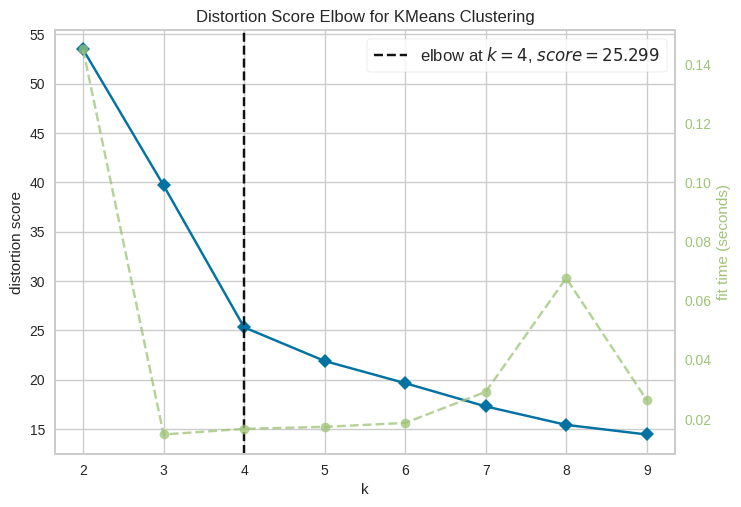

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Find number of clusters using the Elbow Method

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_reduced)
visualizer.show()

The elbow point, as seen in the diagram is at k = 4. Here, the distortion score drops sharply before flattening out. So, the optimal number of clusters for the K-Means clustering is 4.

In [64]:
# ML Model - 1 Implementation: K-Means Clustering

from sklearn.cluster import KMeans

# Use the reduced feature matrix
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

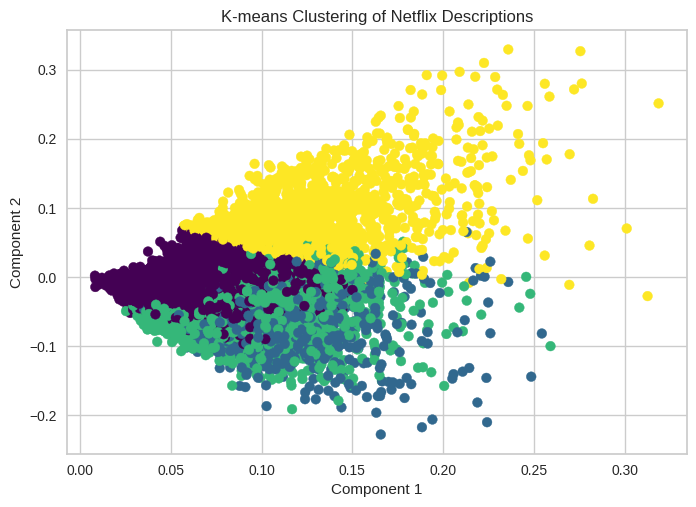

In [65]:
# Visualizing th clusters

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-means Clustering of Netflix Descriptions")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means clustering is an unsupervised ML algorithm. It groups simliar data points together. with the Netflix dataset, it will identify clusters of shows with similar content profiles.

In [66]:
# Calculating evaluation Metric Score chart

from sklearn.metrics import silhouette_score, davies_bouldin_score


silhouette = silhouette_score(X_reduced, clusters)
db_index = davies_bouldin_score(X_reduced, clusters)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.384529042736109
Davies-Bouldin Index: 0.9098678022050758


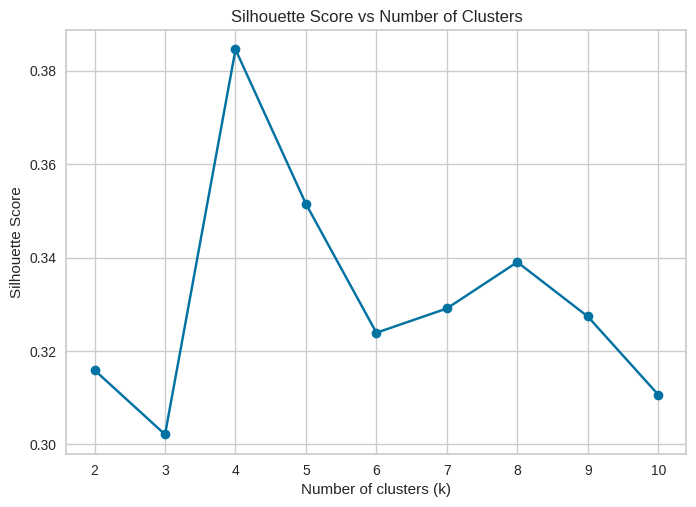

In [67]:
# Visualizing evaluation Metric Score chart

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, preds)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


The silhouette score at 0.38 shows that the clusters are reasonably well sepaarted. At k =4, there is a good balance between cluster quality and meaningful groupings.

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# Cross Validation

from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in kf.split(X_reduced):
    X_train, X_val = X_reduced[train_idx], X_reduced[val_idx]
    model = KMeans(n_clusters=4, random_state=42).fit(X_train)
    preds = model.predict(X_val)
    score = silhouette_score(X_val, preds)
    scores.append(score)

print("Average Silhouette Score:", sum(scores) / len(scores))

Average Silhouette Score: 0.365479662109603


In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score


# Define hyperparameters to tune
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

# Use silhouette score as the evaluation metric
scorer = make_scorer(silhouette_score, greater_is_better=True)


grid = GridSearchCV(KMeans(random_state=42), param_grid, scoring=scorer, cv=3)
grid.fit(X_reduced)

# Best parameters and best score
print("Best parameters:", grid.best_params_)


# Fit the Algorithm

best_kmeans = KMeans(**grid.best_params_, random_state=42)
best_kmeans.fit(X_reduced)

# Predict on the model
clusters = best_kmeans.predict(X_reduced)

Best parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 5}


In [70]:
import numpy as np
kmeans = KMeans(init='k-means++', max_iter=100, n_clusters=2, n_init=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)
print("Unique cluster labels:", np.unique(clusters))

Unique cluster labels: [0 1]


##### Which hyperparameter optimization technique have you used and why?

GridSearch has been used for hyperparameter optimization, because it is a comprehensive method for finding the best combination of hyperparamters for a ML Model. It is effective for models with a limited number of hyperparameters as it evaluates every possible combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [71]:
# for n=2 clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_optimized = KMeans(init='k-means++', max_iter=100, n_clusters=2, n_init=5, random_state=42)
clusters_optimized = kmeans_optimized.fit_predict(X_reduced)
silhouette_optimized = silhouette_score(X_reduced, clusters_optimized)
print("Silhouette Score (n_clusters=2):", silhouette_optimized)

# for n = 4 clusters

kmeans_previous = KMeans(n_clusters=4, random_state=42)
clusters_previous = kmeans_previous.fit_predict(X_reduced)
silhouette_previous = silhouette_score(X_reduced, clusters_previous)
print("Silhouette Score (n_clusters=4):", silhouette_previous)

Silhouette Score (n_clusters=2): 0.38163306324251184
Silhouette Score (n_clusters=4): 0.384529042736109


As noticed, n = 2 clusters has a slightly better silhouette score compared to n = 4 clusters. So, there has been a marginal improvement in the evaluation metric after hyperparameter tuning.

### ML Model - 2

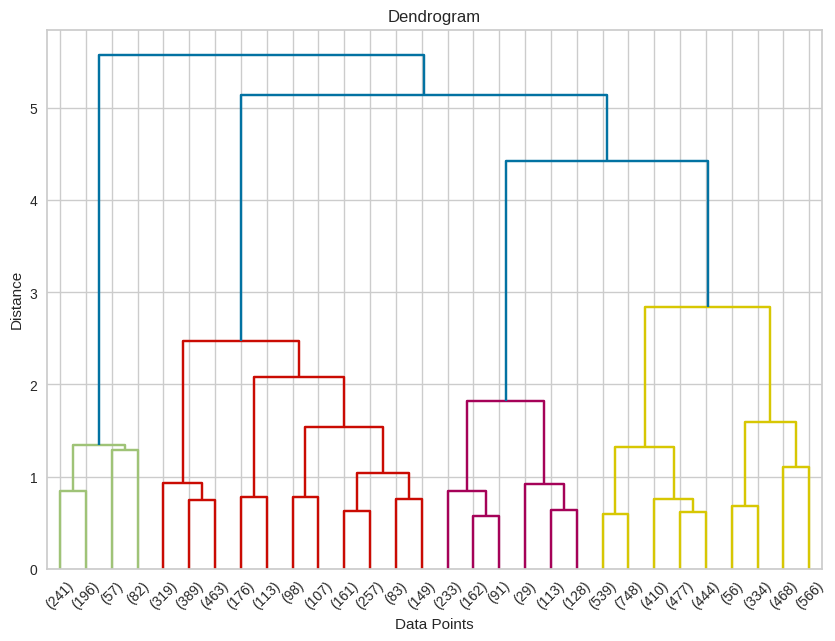

In [72]:
# Dendogram Visualization to determin optimal number of clusters

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_reduced, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Based on the dendogram, 4 clusters is a natural choice.

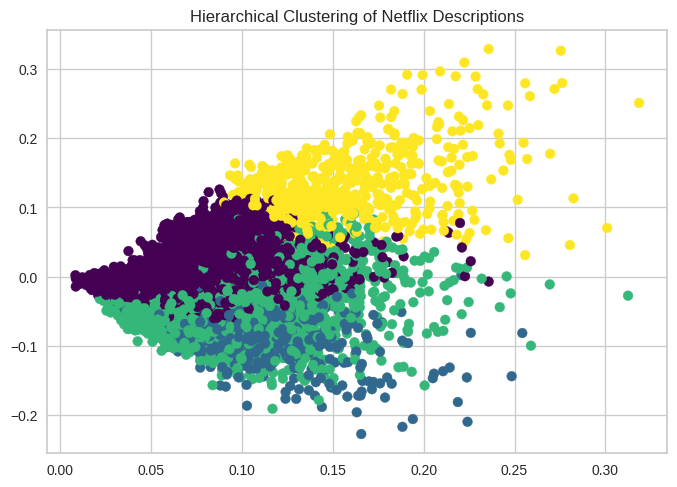

In [73]:
# ML Model 2: Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = agglo.fit_predict(X_reduced)

# Visualize the clusters

import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Hierarchical Clustering of Netflix Descriptions")
plt.show()


The agglomerative hierarchical clustering has been used in this ML Model. It builds clusters by merging similar data points step by steo, forming a tree like structure. The data points are grouped together at different levels of similarity.

In [74]:
# Evaluating the metric score

from sklearn.metrics import silhouette_score

score = silhouette_score(X_reduced, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.32426575097507254


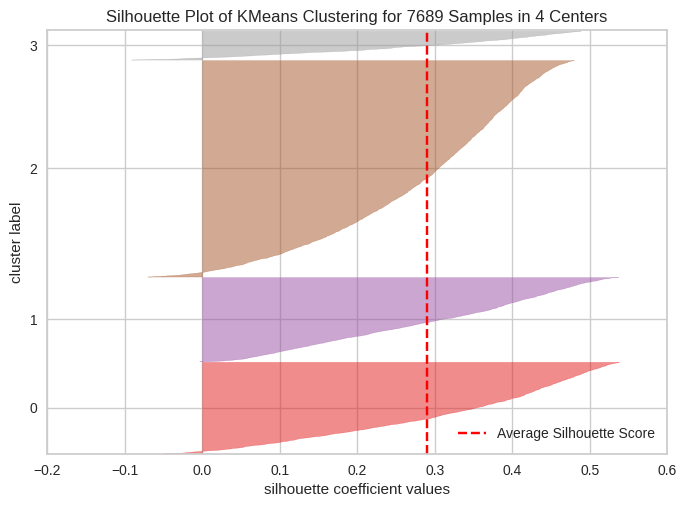

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7689 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# Visualizing evaluation Metric Score chart

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, X=X_reduced)
visualizer.fit(X_reduced)
visualizer.show()

A silhouette score of 0.33 is moderate - the clusters are somewhat separated but there is some overlap and some points may be misclassified.

The visualization shows 4 clusters - the largest one is most well-defined and with a silhouette score of 0.4. The other clusters appear weak.

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# Cross Validation

from sklearn.model_selection import KFold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Example: 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in kf.split(X_reduced):
    X_train, X_val = X_reduced[train_idx], X_reduced[val_idx]
    # Fit on train, predict on validation
    model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
    preds = model.fit_predict(X_val)
    score = silhouette_score(X_val, preds)
    scores.append(score)

print("Average Silhouette Score (CV):", np.mean(scores))

Average Silhouette Score (CV): 0.3096172554843962


The average silhouette score indicate weak but acceptable clustering. Clusters are somewhat separated, but there is an overlap. Though the clustering is not strong, yet it can be used for meaningful analysis.

In [77]:
# Hyperparameter Optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Define parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'linkage': ['ward', 'average', 'complete'],
    # 'metric' is only 'euclidean' for 'ward', but can be others for 'average'/'complete'
    # For 'ward', only 'euclidean' is allowed
    # For 'average'/'complete', you can try 'euclidean', 'cosine', etc.
}



# Since GridSearchCV expects a supervised estimator, we need a workaround:
# Define a custom scorer
scorer = make_scorer(silhouette_score, metric='euclidean')

# To use GridSearchCV, we need a wrapper that implements fit and predict

from sklearn.base import BaseEstimator, ClusterMixin
class AgglomerativeWrapper(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, linkage='ward', metric='euclidean'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.metric = metric
        self.model = None
    def fit(self, X, y=None):
        self.model = AgglomerativeClustering(
            n_clusters=self.n_clusters,
            linkage=self.linkage,
            metric=self.metric
        )
        self.model.fit(X)
        return self
    def predict(self, X):
        return self.model.fit_predict(X)

# Grid search
grid = GridSearchCV(
    AgglomerativeWrapper(),
    param_grid,
    scoring=scorer,
    cv=3  # or use your k-fold splitter
)
grid.fit(X_reduced)

print("Best parameters:", grid.best_params_)


Best parameters: {'linkage': 'ward', 'n_clusters': 2}


##### Which hyperparameter optimization technique have you used and why?

GridSearch has been used for hyperparameter optimization, because it is a comprehensive method for finding the best combination of hyperparamters for a ML Model. It is effective for models with a limited number of hyperparameters as it evaluates every possible combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [78]:
# 1. Original model (n_clusters=4)
model_original = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_original = model_original.fit_predict(X_reduced)
score_original = silhouette_score(X_reduced, labels_original)

# 2. Optimized model (n_clusters=2)
model_optimized = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_optimized = model_optimized.fit_predict(X_reduced)
score_optimized = silhouette_score(X_reduced, labels_optimized)


print(f"Original Silhouette Score (n_clusters=4): {score_original:.4f}")
print(f"Optimized Silhouette Score (n_clusters=2): {score_optimized:.4f}")


Original Silhouette Score (n_clusters=4): 0.3243
Optimized Silhouette Score (n_clusters=2): 0.4582


As indicated by the silhouette scores, the optimized model performs better than the orginial model. Thus, there is a clear improvement after hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered the Silhouette Score as the primary evaluation metric for clustering performance. It is because it measures both cohesion within clusters and separation between clusters.

Business Impact: A higher silhouette score means more distinct and well-separated clusters. It is crucial for tasks like customer segmentation, marketing strategy development and product recommendation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Comparing the silhouette scores for both the models for both 2 and 4 clusters, it can be concluded that agglomerative clustering with 2 clusters gives the highest and the most optimal silhouette score at around 0.46. Thus, this model should be chosen for further prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [79]:
from sklearn.utils import shuffle

# X_reduced is your feature matrix
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
baseline = silhouette_score(X_reduced, model.fit_predict(X_reduced))
feature_importances = []

for i in range(X_reduced.shape[1]):
    X_shuffled = X_reduced.copy()
    X_shuffled[:, i] = shuffle(X_shuffled[:, i])
    shuffled_score = silhouette_score(X_shuffled, model.fit_predict(X_shuffled))
    feature_importances.append(baseline - shuffled_score)

# Normalize and print feature importance
feature_importances = np.array(feature_importances)
feature_importances = feature_importances / np.sum(feature_importances)
for i, imp in enumerate(feature_importances):
    print(f"Feature {i}: {imp:.4f}")

Feature 0: 0.5945
Feature 1: 0.3308
Feature 2: 0.0746


Agglomerative Hierarchical clustering starts by treating each data point as its own cluster and iteratively merges the closest clusters until all the points are in a single cluster or a stopping criterion is met.

Feature Importance: In this model, feature 0 has the highest importance. Shuffling it will cause the largest drop in clustering quality.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Exploratory data analysis on the Netflix dataset have helped us uncover various trends and patterns in the Netflix catalog. Using Machine learning clustering techniques, we aimed to improve content discovery and recommendation system on the platform. Comparing K-Means and agglomerative clustering, we concluded that agglomerative clustering with two clusters delivered the best performance based on silhouette scores.

The best performing model can be saved for future use to further enhance Netflix's recommendation systems and content management strategies. We can also explore development of a hybrid recoomendation systems for more accurate and personalized recommendations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***